In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import tree, svm, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('D.csv')


In [2]:
df[df < 0] = np.nan

In [3]:
df1= df[[ 
'X1SEX',
'X1RACE',                  
'X1DUALLANG',
'X1TXMQUINT',  
'X1CONTROL',
'X1LOCALE',
'X1REGION',
'X2ENROLSTAT',
'X2EVERDROP',
'X2HHNUMBER',
'X2FAMINCOME',
'X3CONTROL',
'X3TSTATGR8B',
'X3TSTATGR11',
'X3T1CREDCALC',
'X3TGPAMAT', 
'X3TGPASOCST',
'X3TCREDGEN',
'X3TCREDADV',
'X3TGPAWGT',
'X4ATNDCLG16FB']]

In [4]:
df1.shape

(23503, 21)

In [5]:
corr=abs(df1.corr())
corr.style.background_gradient(cmap='PuBu')

,X1SEX,X1RACE,X1DUALLANG,X1TXMQUINT,X1CONTROL,X1LOCALE,X1REGION,X2ENROLSTAT,X2EVERDROP,X2HHNUMBER,X2FAMINCOME,X3CONTROL,X3TSTATGR8B,X3TSTATGR11,X3T1CREDCALC,X3TGPAMAT,X3TGPASOCST,X3TCREDGEN,X3TCREDADV,X3TGPAWGT,X4ATNDCLG16FB
X1SEX,1,0.00534414,0.0194615,0.00121259,0.01383,0.0101897,0.00404443,0.0261213,0.0295238,0.00193416,0.0079878,0.0164395,0.0278647,0.0291292,0.00205141,0.145581,0.156597,0.0157695,0.0426612,0.181969,0.0459634
X1RACE,0.00534414,1,0.374431,0.0633983,0.0330972,0.0297533,0.0225047,0.0577506,0.0215937,0.0349835,0.12685,0.0476846,0.0158641,0.0596195,0.0477559,0.0739078,0.0896669,0.0804585,0.040283,0.0880476,0.00272839
X1DUALLANG,0.0194615,0.374431,1,0.00606404,0.0311218,0.0359013,0.0106325,0.0119563,0.00090685,0.0622204,0.0951911,0.0299463,0.0348172,0.0234112,0.0626635,0.00163,0.0102489,0.0693446,0.0637699,0.00287566,0.0357442
X1TXMQUINT,0.00121259,0.0633983,0.00606404,1,0.15294,0.0852019,0.0515741,0.167559,0.171738,0.0189753,0.287877,0.156867,0.204862,0.174734,0.42063,0.525743,0.49338,0.0586645,0.410007,0.56751,0.252638
X1CONTROL,0.01383,0.0330972,0.0311218,0.15294,1,0.237456,0.0911679,0.0384746,0.100732,0.0114472,0.313584,0.892842,0.0758602,0.0656055,0.14489,0.209119,0.196452,0.0588795,0.0401022,0.211667,0.148347
X1LOCALE,0.0101897,0.0297533,0.0359013,0.0852019,0.237456,1,0.0136991,0.0274408,0.0140828,0.0274646,0.122243,0.220501,0.0406205,0.0136083,0.0798813,0.0218047,0.0219367,0.105456,0.115799,0.0275217,0.0916329
X1REGION,0.00404443,0.0225047,0.0106325,0.0515741,0.0911679,0.0136991,1,0.0462438,0.0386456,0.00873569,0.0434125,0.0843343,0.00584279,0.0372044,0.0686335,0.0602263,0.042747,0.0476461,0.00975252,0.042881,0.0444662
X2ENROLSTAT,0.0261213,0.0577506,0.0119563,0.167559,0.0384746,0.0274408,0.0462438,1,0.306495,0.00939858,0.113099,0.0656366,0.0479226,0.448864,0.125639,0.24923,0.276822,0.355874,0.174072,0.312737,0.101416
X2EVERDROP,0.0295238,0.0215937,0.00090685,0.171738,0.100732,0.0140828,0.0386456,0.306495,1,0.0114848,0.125045,0.0957072,0.0461986,0.280416,0.104237,0.23805,0.265662,0.243189,0.13261,0.302788,0.0967313
X2HHNUMBER,0.00193416,0.0349835,0.0622204,0.0189753,0.0114472,0.0274646,0.00873569,0.00939858,0.0114848,1,0.0221538,0.0092787,0.0238443,0.00401247,0.00954848,0.00328193,0.00809583,0.00374985,0.00515861,0.0097484,0.0244178


In [6]:
df2= df[[
'X1TXMQUINT',
'X2ENROLSTAT',
'X2EVERDROP',  
'X2FAMINCOME',
'X3CONTROL', 
'X3TSTATGR11', 
'X3T1CREDCALC',
'X3TGPAMAT',
'X3TGPASOCST',   
'X3TGPAWGT',     
'X1SEX',    
'X3TCREDGEN',
'X4EVRAPPCLG'
]] 


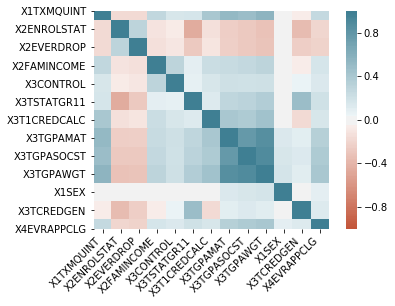

In [7]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

corr = df2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

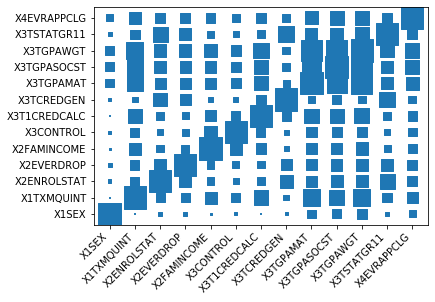

In [8]:
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
corr = df2.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

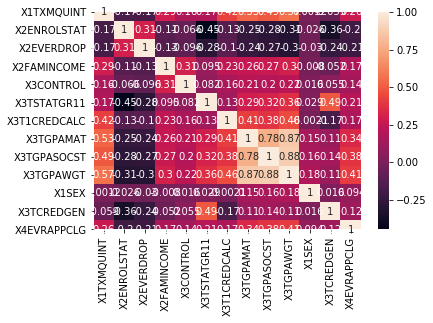

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()